############################################################################################
################## -- Programa de Especialización en Data Science Nivel II --##########################
############################################################################################

Modelos de Regresión y Clasificación Avanzados : Regresión Múltiple, Regresiones Penalizadas

Autores : José Cárdenas - André Chávez 

In [ ]:
##################################################
##### Modelo de Regresión Lineal Simple ##########
##################################################

In [25]:
# Cargamos las librerías a utilizar
% matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import sklearn
vivienda=pd.read_excel('C:/Users/Andre Chavez/Desktop/Datos/PrecioVivienda.xlsx')

In [26]:
vivienda.shape

(128, 2)

In [42]:
vivienda.head(2)

,Precio,Piescuad
0,114300,1790
1,114200,2030


In [27]:
# Antes de poder realizar el modelo de regresión lineal debemos ver si existe asociación y de qué tipo es.
# coeficiente de correlación
corr=vivienda.corr()
print(corr)

            Precio  Piescuad
Precio    1.000000  0.552982
Piescuad  0.552982  1.000000


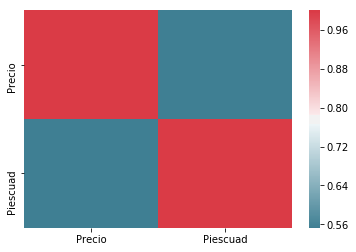

In [28]:
# Podemos realizar un heatmap o mapa de calor para observar la relación e intensidad de la correlación
sns.heatmap(corr,cmap=cmap)

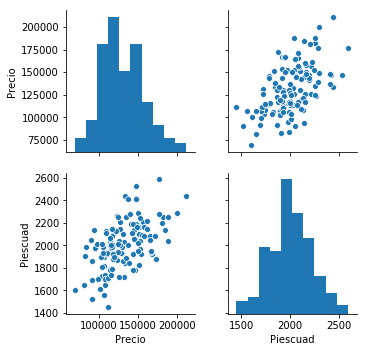

In [29]:
# Pairplot 
par= sns.pairplot(vivienda)

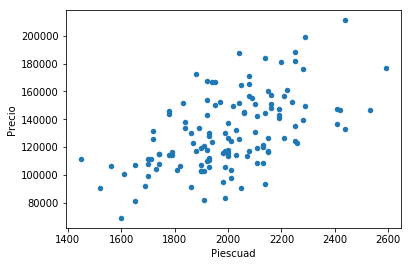

In [30]:
# Diagrama de dispersión
disp= vivienda.plot(kind='scatter', x='Piescuad', y='Precio')
disp

In [ ]:
# Separamos la VD y la VI

In [31]:
# Al dataset o set de entrenamiento le retiramos la variable dependiente o target
X=vivienda.drop('Precio',axis=1)
y=vivienda.Precio

In [32]:
# Cargamos el modelo de regresión lineal
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
# Parámetros de la Regresión Lineal en Python:
# fit_intercept, uno decide si elegimos un modelo con o sin intercepto
# normalize , uno podría normalizar los datos, es decir ponerlos en una misma escala o escalas parecidas.
# n_jobs  , número de procesadores a trabajar, por defecto es 1, si ponemos -1 elegimos todos los procesadores.

In [34]:
# Entrenamiento
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
# Hallamos el intercepto u ordenada en el origen
print("El coeficiente asociado a la ordenada en el origen es :")
lm.intercept_

El coeficiente asociado a la ordenada en el origen es :


-10091.129909123119

In [36]:
# Hallamos el intercepto u ordenada en el origen
print("El coeficiente asociado a la ordenada en el origen es :")
lm.coef_

El coeficiente asociado a la ordenada en el origen es :


array([ 70.22631824])

Text(0.5,1,'Gráfico de Dispersión entre Precios vs Precio Estimados')

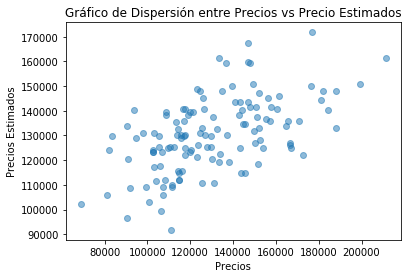

In [37]:
plt.scatter(vivienda.Precio,lm.predict(X), alpha=0.5)
plt.xlabel("Precios")
plt.ylabel("Precios Estimados")
plt.title("Gráfico de Dispersión entre Precios vs Precio Estimados")

In [38]:
# Veamos el MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y, lm.predict(X))

497256650.32998586

In [40]:
# Podemos calcular el coeficiente de determinación o R2
lm.score(X,y)

0.30578936058169193

In [123]:
# Prediciendo sobre los 5 primeros valores de pies cuadrados
lm.predict(X)[0:5]

array([ 115613.97974564,  132468.29612393,  112102.6638335 ,
        128956.98021179,  139490.92794822])

In [43]:
# Así también podemos predecir sobre el valor de X que nosotros deseemos
lm.predict(2030)

array([ 132468.29612393])

In [ ]:
##################################################
##### Modelo de Regresión Lineal Múltiple ########
##################################################

In [44]:
# Cargamos las librerías a utilizar
% matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import sklearn

In [45]:
from sklearn.datasets import load_boston # Existen datasets que podemos utilizar en el desarrollo de los temas. UCI

In [46]:
# Cargamos la data con la información
boston=load_boston()

In [47]:
# Observamos los elementos que extraemos en la data
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [48]:
boston.data.shape

(506, 13)

In [49]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [50]:
# Descripción del dataset
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [51]:
# Podemos obervar los datos que provienen en la información
bos = pd.DataFrame(boston.data)

In [52]:
bos.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [53]:
bos.columns = boston.feature_names

In [54]:
bos.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [55]:
boston.target[:5]

array([ 24. ,  21.6,  34.7,  33.4,  36.2])

In [56]:
# Le asignamos el nombre a la variable target o más importante
bos["PRICE"]=boston.target

In [57]:
bos.head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4


In [60]:
# Al dataset o set de entrenamiento le retiramos la variable dependiente o target 
X=bos.drop("PRICE",axis=1)
y=bos.PRICE

In [61]:
# Cargamos el modelo de regresión lineal
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [62]:
# Entrenamiento
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
# Hallamos el intercepto u ordenada en el origen
print("El coeficiente asociado a la ordenada en el origen es :")
lm.intercept_

El coeficiente asociado a la ordenada en el origen es :


36.491103280363404

In [64]:
# Hallamos el coeficiente
print("El núnero de coeficientes es :")
len(lm.coef_)

El núnero de coeficientes es :


13

In [68]:
# Podemos observar todos los coeficientes asignados con sus nombres
coef=pd.DataFrame(lm.coef_,X.columns,columns=['Coeficiente'])
coef

,Coeficiente
CRIM,-0.107171
ZN,0.046395
INDUS,0.020860
CHAS,2.688561
NOX,-17.795759
RM,3.804752
AGE,0.000751
DIS,-1.475759
RAD,0.305655
TAX,-0.012329


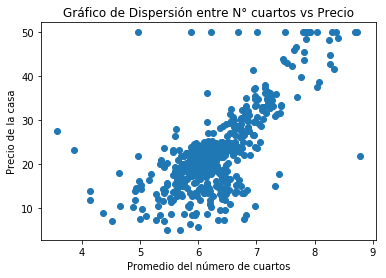

In [69]:
plt.scatter(bos.RM,y)
plt.xlabel("Promedio del número de cuartos")
plt.ylabel("Precio de la casa")
plt.title("Gráfico de Dispersión entre N° cuartos vs Precio")
plt.show()

In [148]:
# Con predict podemos predecir cualquier valor deseado.
lm.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

Text(0.5,1,'Gráfico de Dispersión entre Precios vs Precio Estimados')

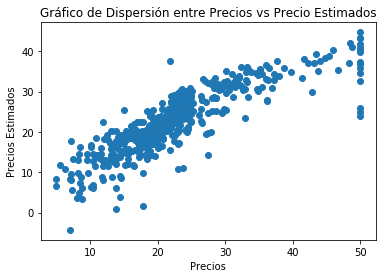

In [70]:
plt.scatter(y,lm.predict(X))
plt.xlabel("Precios")
plt.ylabel("Precios Estimados")
plt.title("Gráfico de Dispersión entre Precios vs Precio Estimados")

In [71]:
# Calculamos el error cuadrático medio u algún indicador para validar que tan bien fue nuestra predicción.
mse_Total = np.mean((y-lm.predict(X))**2)
mse_Total

21.897779217687486

In [72]:
# Podemos correr otro modelo de regresión y comparar los resultados
lm=LinearRegression()
lm.fit(X[['PTRATIO']],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
mse_Parcial=np.mean((y-lm.predict(X[['PTRATIO']]))**2)
mse_Parcial

62.65220001376927

######--- Metodología de Modelamiento ---#######

In [75]:
# Dividimos el conjunto de datos en train, test, validacion 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.30,random_state=5)

In [76]:
# Podemos revisar la cantidad de elementos por dataset
X_train.shape
Y_train.shape
X_test.shape
Y_test.shape

(152,)

In [77]:
# Ajustamos el modelo de regresión lineal
lm=LinearRegression()
lm.fit(X_train , Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [78]:
pred_train=lm.predict(X_train)
pred_test=lm.predict(X_test)

In [79]:
print("Fit a model X_train, and calculate MSE with Y_train:",
      np.mean((Y_train - lm.predict(X_train)) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, Y_test:", 
      np.mean((Y_test - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 19.071527965850688
Fit a model X_train, and calculate MSE with X_test, Y_test: 30.703232207219212


In [ ]:
##################################################
##### Modelo de Regresión Penalizadas ############
##################################################

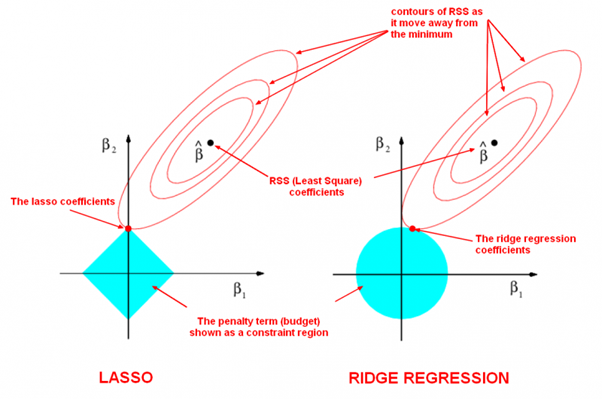

In [85]:
##########################################################
##### Modelo de Regresión Penalizadas : Ridge ############
##########################################################

In [80]:
# Cargamos las librerías necesarias
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [92]:
# Creamos un vector con los valores de alpha o constante de penalización
alphas = 10**np.linspace(10,-1,100)*0.5
alphas.shape

(100,)

In [96]:
# Generamos las covariables y la VD.
X=bos.drop("PRICE",axis=1)
y=bos.PRICE

In [97]:
# Generamos el ajuste de las regresiones para cada valor de alpha
ridge = Ridge(normalize = True)
coefs = []
for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 13)

Text(0,0.5,'weights')

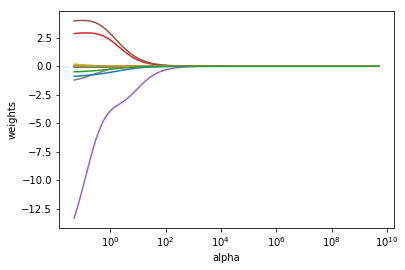

In [101]:
# Graficamos los valores de alpha
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [103]:
# Dividimos o partimos la data en train y test
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [113]:
# Le asignamos un valor pequeño a alpha y observamos que pasa con el error en el test
ridge2 = Ridge(alpha = 0.0001, normalize = True)
ridge2.fit(X_train, y_train)             # Ajustamos el modelo ridge
pred2 = ridge2.predict(X_test)           # Usamos el modelo para predecir
print(pd.Series(ridge2.coef_, index = X.columns)) # Pintamos los coeficientes
print(mean_squared_error(y_test, pred2))          # Calculamos el MSE

CRIM       -0.101591
ZN          0.065508
INDUS      -0.009374
CHAS        1.457117
NOX       -17.266451
RM          3.304430
AGE         0.011035
DIS        -1.373534
RAD         0.321820
TAX        -0.011962
PTRATIO    -0.822075
B           0.008887
LSTAT      -0.530321
dtype: float64
22.8269164603


In [114]:
# Le asignamos un valor grande a alpha y observamos que pasa con el error en el test
ridge3 = Ridge(alpha = 0.1, normalize = True)
ridge3.fit(X_train, y_train)             # Ajuste del modelo ridge
pred3 = ridge3.predict(X_test)           # Usamos el modelo para predecir
print(pd.Series(ridge3.coef_, index = X.columns)) 
print(mean_squared_error(y_test, pred3))     

CRIM       -0.077545
ZN          0.035249
INDUS      -0.089016
CHAS        1.662720
NOX       -10.830311
RM          3.628359
AGE         0.002685
DIS        -0.864977
RAD         0.137207
TAX        -0.003067
PTRATIO    -0.768711
B           0.008568
LSTAT      -0.452966
dtype: float64
24.2981597623


In [115]:
# ¿Qué pasa si alpha o el coeficiente de penalización es 0?
ridge2 = Ridge(alpha = 0, normalize = True)
ridge2.fit(X_train, y_train)    
pred = ridge2.predict(X_test)            
print(pd.Series(ridge2.coef_, index = X.columns)) 
print(mean_squared_error(y_test, pred))           

CRIM       -0.101649
ZN          0.065586
INDUS      -0.009083
CHAS        1.456272
NOX       -17.277956
RM          3.303619
AGE         0.011048
DIS        -1.374456
RAD         0.322356
TAX        -0.011993
PTRATIO    -0.822050
B           0.008887
LSTAT      -0.530429
dtype: float64
22.8267065844


In [116]:
# Podemos hallar el mejor valor de alpha por Cv
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.050000000000000003

In [117]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

23.49802962034379

In [118]:
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)

CRIM       -0.091150
ZN          0.035522
INDUS      -0.027597
CHAS        2.870890
NOX       -13.330640
RM          3.982071
AGE        -0.002874
DIS        -1.212024
RAD         0.182669
TAX        -0.006841
PTRATIO    -0.880501
B           0.009232
LSTAT      -0.487090
dtype: float64

In [111]:
##########################################################
##### Modelo de Regresión Penalizadas : Lasso ############
##########################################################

Text(0,0.5,'weights')

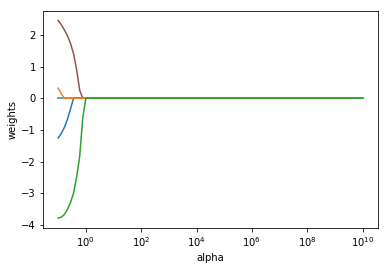

In [112]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [204]:
# Elegimos el mejor o el valor más óptimo de alpha por Cv
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

22.843590646678322

In [205]:
# Podemos observar que algunos coeficientes se hacen casi 0
pd.Series(lasso.coef_, index=X.columns)

CRIM       -0.096428
ZN          0.060985
INDUS      -0.017452
CHAS        1.454806
NOX       -16.554529
RM          3.352740
AGE         0.008980
DIS        -1.323591
RAD         0.291928
TAX        -0.010431
PTRATIO    -0.820432
B           0.008796
LSTAT      -0.526971
dtype: float64

In [1]:
#######################################################################
##### Modelo de Regresión Logística y Logística Penalizada ############
#######################################################################

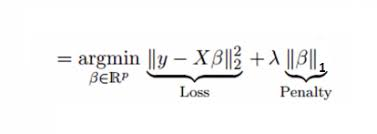

In [1]:
#Importar las librerías necesarias en Python.
import pandas as pd ## Manejo de dataframes o set de datos
%matplotlib inline
import matplotlib.pyplot as plt2 ## Todo lo referente a gráficas y demás.
import matplotlib as plt
import numpy as np ## Todo lo referente a trabajar con vectores y matrices
from scipy import stats ## Herramientas y algoritmos matemáticos para python
import seaborn as sns # Se basa en Matplotlib y la complementa en el tema de graficos y demás.

In [2]:
# Leer el dataset en un dataframe usando pandas
train = pd.read_csv("C:/Users/Andre Chavez/Desktop/Datos/train.csv") 

In [3]:
train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train.apply(num_missing, axis=0)) # Axis = 0 es vertical , axis =1 horizontal.

Valores perdidos por columna
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [5]:
train['Dependents'] = train['Dependents'].replace({'0': 1,'1': 2, '2': 3, '3+': 4})
train['Gender'] = train['Gender'].replace({'Female': 1,'Male': 2})
train['Married'] = train['Married'].replace({'No': 1,'Yes': 2})
train['Self_Employed'] = train['Self_Employed'].replace({'No': 1,'Yes': 2})
train['Education'] = train['Education'].replace({'Graduate': 1,'Not Graduate': 2})
train['Credit_History'] = train['Credit_History'].replace({0: 1,1: 2})
train['Property_Area'] = train['Property_Area'].replace({'Rural': 1, 'Semiurban': 2, 'Urban': 3})
train['Loan_Status'] = train['Loan_Status'].replace({'N': 0,'Y': 1})

In [6]:
# Creamos un copia del dataset original para poder realizar las imputaciones
# Imputacion del Data train
train_parametrica=train.copy()
train_parametrica.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2.0,1.0,1.0,1,1.0,5849,0.0,NaN,360.0,2.0,3,1
1,LP001003,2.0,2.0,2.0,1,1.0,4583,1508.0,128.0,360.0,2.0,1,0
2,LP001005,2.0,2.0,1.0,1,2.0,3000,0.0,66.0,360.0,2.0,3,1
3,LP001006,2.0,2.0,1.0,2,1.0,2583,2358.0,120.0,360.0,2.0,3,1
4,LP001008,2.0,1.0,1.0,1,1.0,6000,0.0,141.0,360.0,2.0,3,1


In [7]:
# Imputación Paramétrica
# Para variables cuantitativas se puede usar medias o medianas, para las cualitativas moda.
# Imputamos por las moda todas las variables cualitativas
from scipy.stats import mode

for column in ['Gender', 'Married', 'Self_Employed', 'Credit_History','Dependents']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].mode()[0])

# Imputamos por las moda todas las variables cuantitativas

for column in ['LoanAmount', 'Loan_Amount_Term']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].median())   

In [8]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [9]:
# Le quitamos la variable Loan_ID o identificador único para poder modelar la información 
train_parametrica = train_parametrica.drop('Loan_ID', axis=1)

In [10]:
# Creación de la data de train y la data de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_parametrica.drop('Loan_Status', axis=1), train_parametrica['Loan_Status'], test_size=0.30,
                                                   random_state=100)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

lr = LogisticRegression(penalty='l2') # Regresion Logistica Ridge
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
lr.coef_

array([[ -4.71309878e-01,   4.88571248e-01,   5.72836720e-02,
         -7.08109803e-01,  -2.86778069e-01,  -1.57405482e-05,
         -5.18235761e-05,  -2.91794078e-03,  -1.27767007e-03,
          2.75482847e+00,  -1.52288142e-01]])

In [21]:
lr2.coef_

array([[ -1.57026398e-01,   5.05984703e-01,   4.35653780e-02,
         -6.14526832e-01,  -6.74309316e-02,  -1.75523170e-05,
         -5.69972513e-05,  -3.15125873e-03,  -1.00207052e-04,
          3.46005874e+00,  -1.11693708e-01]])

In [12]:
y_pred=lr.predict(X_test)

In [13]:
#Atributos
#lr.coef_ 
#lr.score(X, y)
print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.773

	Precision: 0.763
	Recall: 0.951
	F1: 0.847



In [14]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.82      0.43      0.56        63
          1       0.76      0.95      0.85       122

avg / total       0.78      0.77      0.75       185



In [15]:
lr2 = LogisticRegression(penalty='l1') # Regresion Logistica Ridge
lr2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
y_pred2=lr2.predict(X_test)

In [19]:
#Atributos
#lr.coef_ 
#lr.score(X, y)
print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred2))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred2))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred2))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred2))

	Accuracy: 0.773

	Precision: 0.763
	Recall: 0.951
	F1: 0.847

